# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: CodeChallenge: dynamic learning rates

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Create the function and its derivative

In [2]:
# define a range for x
x = np.linspace(-2,2,2001)

# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

### G.D. using a fixed learning rate

In [3]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsFixed[i,0] = localmin
  modelparamsFixed[i,1] = grad
  modelparamsFixed[i,2] = lr

C:\Users\estela.ribeiro\AppData\Local\Temp\ipykernel_12768\2377602908.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,0] = localmin
C:\Users\estela.ribeiro\AppData\Local\Temp\ipykernel_12768\2377602908.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,1] = grad


### G.D. using a gradient-based learning rate

In [4]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
  # compute gradient
  grad = deriv(localmin)

  # adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,0] = localmin
  modelparamsGrad[i,1] = grad
  modelparamsGrad[i,2] = lr

'''
Neste caso, o learning_rate é ponderado pelo grad. Assim, o lr vai diminuir conforme o grad diminui tbm.
Assim, o lr é maior quando inicia o treinamento e diminui conforme vai chegando proximo da solução.
'''

C:\Users\estela.ribeiro\AppData\Local\Temp\ipykernel_12768\113732522.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
C:\Users\estela.ribeiro\AppData\Local\Temp\ipykernel_12768\113732522.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
C:\Users\estela.ribeiro\AppData\Local\Temp\ipykernel_12768\113732522.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


### G.D. using a time-based learning rate

In [5]:
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*( 1 - (i+1)/training_epochs )
  localmin = localmin - lr*grad
  modelparamsTime[i,0] = localmin
  modelparamsTime[i,1] = grad
  modelparamsTime[i,2] = lr

'''
Nesse caso, quando inicia o treinamento, o lr grande (perto de .1). 
Conforme aumentamos as epochs, a conta faz com que learning_rate * (algo próximo de zero)
Gerando o 'mesmo' efeito do anterior
'''

C:\Users\estela.ribeiro\AppData\Local\Temp\ipykernel_12768\287006009.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,0] = localmin
C:\Users\estela.ribeiro\AppData\Local\Temp\ipykernel_12768\287006009.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,1] = grad


### Plot the results

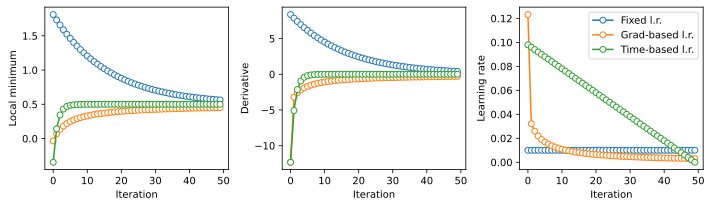

In [6]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()